In [ ]:
#Importing the liabraries

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy
import os

In [6]:
###Importing the sample dataset

In [169]:
os.chdir(r'C:\Users\Al barak\Desktop\ml project\Regression Project _Indian House rent prediction')
data = pd.read_csv("House_Rent_Dataset.csv")

#making copy of original datset
data1 = data.copy()

#scanning the dataset using descriptive statistics
data1.describe(include= "all")

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
count,4746,4746.000000,4.746000e+03,4746.000000,4746,4746,4746,4746,4746,4746,4746.000000,4746
unique,81,NaN,NaN,NaN,480,3,2235,6,3,3,NaN,3
top,2022-07-06,NaN,NaN,NaN,1 out of 2,Super Area,Bandra West,Mumbai,Semi-Furnished,Bachelors/Family,NaN,Contact Owner
freq,311,NaN,NaN,NaN,379,2446,37,972,2251,3444,NaN,3216
mean,NaN,2.083860,3.499345e+04,967.490729,NaN,NaN,NaN,NaN,NaN,NaN,1.965866,NaN
std,NaN,0.832256,7.810641e+04,634.202328,NaN,NaN,NaN,NaN,NaN,NaN,0.884532,NaN
min,NaN,1.000000,1.200000e+03,10.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN
25%,NaN,2.000000,1.000000e+04,550.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN
50%,NaN,2.000000,1.600000e+04,850.000000,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,NaN
75%,NaN,3.000000,3.300000e+04,1200.000000,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,NaN


In [54]:
#Separting Dependent(y) and Independent variables(X)
X = data1.drop(["Rent"],axis=1)
y = data1.Rent

In [55]:
## Splitting data into Train ,Validation and Test

In [56]:
#importing library to split data
from sklearn.model_selection import train_test_split

In [57]:
#Based on the size of the dataset we roughly decide the split ratio which is not subjective,lets make a 70:30 split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state =42)

In [58]:
#From the train data now we can split the validation data which can be used to validate the trained model over this data.
#The test data kept under complete darkness for final testing of the model.
#here we are again making 70:30 split,which is 30% of 70% which is 0.43
X_train,X_valid,y_train,y_valid = train_test_split(X_train,y_train,test_size=0.43,random_state=42) 

In [ ]:
## EXPLORATORY DATA ANALYSIS

In [60]:
# To avoid biasness in EDA is made even before cleaning 
X_train.describe()

,BHK,Size,Bathroom
count,1893.000000,1893.000000,1893.000000
mean,2.063920,939.358690,1.941363
std,0.845103,612.137617,0.869525
min,1.000000,10.000000,1.000000
25%,1.000000,550.000000,1.000000
50%,2.000000,800.000000,2.000000
75%,3.000000,1200.000000,2.000000
max,6.000000,4761.000000,7.000000


In [62]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1893 entries, 2374 to 3581
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          1893 non-null   object
 1   BHK                1893 non-null   int64 
 2   Size               1893 non-null   int64 
 3   Floor              1893 non-null   object
 4   Area Type          1893 non-null   object
 5   Area Locality      1893 non-null   object
 6   City               1893 non-null   object
 7   Furnishing Status  1893 non-null   object
 8   Tenant Preferred   1893 non-null   object
 9   Bathroom           1893 non-null   int64 
 10  Point of Contact   1893 non-null   object
dtypes: int64(3), object(8)
memory usage: 177.5+ KB


In [94]:
# Bivariate analysis on training dataset to understand the data better and to have preliminary insights from the data

In [95]:
#combining Xtrain&ytrain into dataframe for easiness
train_y_data = pd.DataFrame(y_train)
traindata_Xy = pd.concat([X_train, train_y_data], axis=1, join="inner")
traindata_Xy.head()

,Posted On,BHK,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Rent
2374,2022-05-15,3,1200,1 out of 4,Carpet Area,"Gubbalala, Subramanyapura",Bangalore,Unfurnished,Bachelors,3,Contact Owner,16000
3501,2022-06-06,2,803,1 out of 2,Super Area,"Moulivakkam, Moulivakkam",Chennai,Semi-Furnished,Bachelors/Family,2,Contact Owner,11000
4682,2022-05-12,2,1150,4 out of 5,Super Area,"Miyapur, NH 9",Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner,18000
4291,2022-06-14,2,60,1 out of 6,Super Area,"Model Town Colony, Nawab Saheb Kunta",Hyderabad,Unfurnished,Bachelors/Family,2,Contact Owner,7000
4030,2022-07-02,3,1956,1 out of 9,Super Area,"Miyapur, NH 9",Hyderabad,Semi-Furnished,Bachelors,3,Contact Owner,35000


In [ ]:
## categorical variables vs Target variable

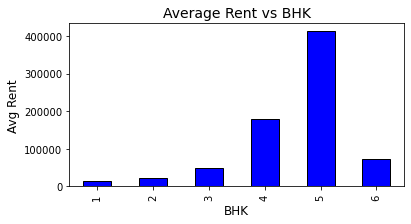

In [116]:
# BHK vs Rent
traindata_Xy.groupby(['BHK'])['Rent'].mean().plot(kind='bar',figsize=(6,3),color="blue",fontsize=10,edgecolor="Black")
plt.xlabel('BHK',fontsize=12)
plt.ylabel('Avg Rent',fontsize=12)
plt.title('Average Rent vs BHK',fontsize=14)
plt.show()
# Under our analysis,5BHK houses has the highest average rental price.

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


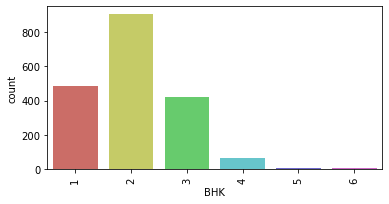

In [125]:
#BHK
plt.figure(figsize=(6,3))
sns.countplot(traindata_Xy['BHK'],data = traindata_Xy, palette='hls')
plt.xticks(rotation = 90)
plt.show()
#Number of 2BHK houses are higher in our dataset.

Text(0.5, 1.0, 'Average Rent vs Area Type')

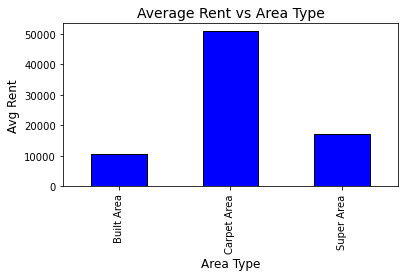

In [159]:
# Area type vs Rent
traindata_Xy.groupby(['Area Type'])['Rent'].mean().plot(kind='bar',figsize=(6,3),color="blue",fontsize=10,edgecolor="Black")
plt.xlabel('Area Type',fontsize=12)
plt.ylabel('Avg Rent',fontsize=12)
plt.title('Average Rent vs Area Type',fontsize=14)
# Under our analysis,Carpet Area Houses has higher average rental price.

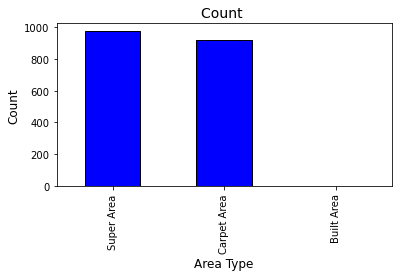

In [164]:
#Area Type
traindata_Xy["Area Type"].value_counts().plot(kind='bar',figsize=(6,3),color="blue",fontsize=10,edgecolor="black")
plt.xlabel('Area Type',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.title('Count ',fontsize=14)
plt.show()

In [ ]:
df[['First','Last']] = df.Name.str.split("_",expand=True)

In [ ]:
# Furnished status vs Rent



In [ ]:
#Furnished status

In [ ]:
# Point of contact vs Rent




In [ ]:
#Point of contact

In [ ]:
# Numerical Variable vs Target Variable

<AxesSubplot:xlabel='Size', ylabel='Rent'>

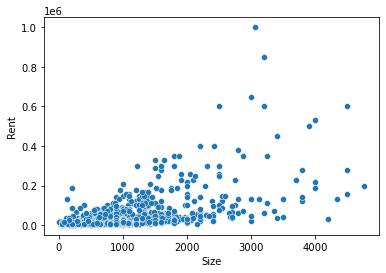

In [132]:
#Size vs Rent
sns.scatterplot(data=traindata_Xy, x="Size", y="Rent")
# We can see a rough positive linear relationship between size and price.(i.e) when the size increases the price increases.

In [ ]:
## MULTIVARIATE ANALYSIS

In [168]:
traindata_Xy.columns

Index(['Posted On', 'BHK', 'Size', 'Floor', 'Area Type', 'Area Locality',
       'City', 'Furnishing Status', 'Tenant Preferred', 'Bathroom',
       'Point of Contact', 'Rent'],
      dtype='object')

In [ ]:
#City vs Size vs Rent

In [ ]:
#City vs BHK vs Rent

In [ ]:
#BHK vs Bathroom vs Rent

In [ ]:
#Floor vs Total Floor vs Rent

--------------------------------------------------------------------------------------------------------------------------------

In [ ]:
## DATA CLEANING

In [ ]:
# Our dataset doesnot contain any missing entries,if found there should appropraitely dealt with the help of central tendencies(mean,median,mode)
# if the data is normally distributed(continuous numerical),empty cells can be filled by mean,if the data is skewed it can filled by median,if its categorical then by mode.
# if the target value is missing ,its appropriate to remove that record/row.
# if the number of missing values  are higher in a series/column, its better to drop that column.

In [ ]:
# Remove duplicates from data
data1.drop_duplicates(keep=False, inplace=True)